# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [383]:
import pandas as pd
import numpy as np

## Perguntas - Obesity among adults by country, 1975-2016

In [384]:
df_obesity = pd.read_csv("Datasets/obesity_cleaned.csv")

- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [385]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   24570 non-null  int64 
 1   Country      24570 non-null  object
 2   Year         24570 non-null  int64 
 3   Obesity (%)  24570 non-null  object
 4   Sex          24570 non-null  object
dtypes: int64(2), object(3)
memory usage: 959.9+ KB


In [386]:
df_obesity

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...,...
24565,24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


In [387]:
#df_obesity = df_obesity.set_index('Unnamed: 0')
del df_obesity['Unnamed: 0'] #Corrido pela aula

In [388]:
df_obesity['Obesity (%)'].value_counts()

No data             504
0.4 [0.1-1.0]        55
0.6 [0.2-1.3]        47
0.3 [0.1-0.7]        46
0.3 [0.1-0.8]        46
                   ... 
2.9 [1.4-5.6]         1
27.9 [22.7-33.3]      1
6.5 [3.3-10.9]        1
24.0 [21.0-27.0]      1
9.5 [5.6-14.3]        1
Name: Obesity (%), Length: 16375, dtype: int64

In [389]:
# df_obesity['Obesity (%)'].apply(lambda x: x.split()[0]) Correção do Professor
df_obesity['Obesity (%)'].str.split(' ', n=1, expand=True)[0]

0         0.5
1         0.2
2         0.8
3         0.5
4         0.2
         ... 
24565     4.5
24566    24.8
24567    15.5
24568     4.7
24569    25.3
Name: 0, Length: 24570, dtype: object

In [390]:
# df_obesity['Obesity'] = df_obesity['Obesity (%)'].apply(lambda x: x.split()[0]) Correção do Professor
df_obesity['Obesity'] = df_obesity['Obesity (%)'].str.split(' ', n=1, expand=True)[0]

In [391]:
df_obesity['Obesity']

0         0.5
1         0.2
2         0.8
3         0.5
4         0.2
         ... 
24565     4.5
24566    24.8
24567    15.5
24568     4.7
24569    25.3
Name: Obesity, Length: 24570, dtype: object

In [392]:
#Dados "No" separado quando eu fiz o split no "No data"
#df_obesity.iloc[20800]

#Utilizando value_counts() para verificar os "No"
df_obesity['Obesity'].value_counts()

No      504
0.4     222
0.6     218
0.5     217
0.7     210
       ... 
63.1      1
54.1      1
57.4      1
60.0      1
55.2      1
Name: Obesity, Length: 602, dtype: int64

In [393]:
#Usando o método replace() para substituir o "No" por valores nulo
df_obesity['Obesity'] = df_obesity['Obesity'].replace(to_replace='No', value=np.NaN)

# df_obesity.loc[df_obesity['Obesity'] == 'No', 'Obesity'] = np.nan Versão do Professor, funciona igual ao de cima

In [394]:
df_obesity['Obesity'].value_counts()

0.4     222
0.6     218
0.5     217
0.7     210
0.8     201
       ... 
56.6      1
48.0      1
54.2      1
48.9      1
60.1      1
Name: Obesity, Length: 601, dtype: int64

In [397]:
df_obesity['Obesity'].isnull().sum()

504

In [401]:
#Apagando as linhas cujo os valores são nulos
df_obesity = df_obesity.dropna()

In [402]:
df_obesity['Obesity'].isnull().sum()

0

In [405]:
#usando a função de dataframe df.astype para definir a coluno como float
df_obesity['Obesity'] = df_obesity['Obesity'].astype(float)

# df_obesity['Obesity'] = df_obesity['Obesity'].apply(lambda x : float(x))

In [406]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24066 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      24066 non-null  object 
 1   Year         24066 non-null  int64  
 2   Obesity (%)  24066 non-null  object 
 3   Sex          24066 non-null  object 
 4   Obesity      24066 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.1+ MB


- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [407]:
#Correção pelo Professor
df_obesity[df_obesity['Year'] == 2015].groupby('Sex').mean()

,Year,Obesity
Sex,,
Both sexes,2015,19.508377
Female,2015,22.899476
Male,2015,15.980628


In [274]:
perc_med_male_2015 = df_obesity[(df_obesity['Year']==2015) & (df_obesity['Sex'] == "Male")]['Obesity'].mean()

In [408]:
perc_med_female_2015 = df_obesity[(df_obesity['Year']==2015) & (df_obesity['Sex'] == "Female")]['Obesity'].mean()

In [412]:
perc_med_bothsexes_2015 = df_obesity[(df_obesity['Year']==2015) & (df_obesity['Sex'] == "Both sexes")]['Obesity'].mean()

In [413]:
perc_med_male_2015

15.980628272251304

In [414]:
perc_med_female_2015

22.899476439790575

In [415]:
perc_med_bothsexes_2015

19.508376963350777

In [253]:
df_obesity['Sex'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [258]:
df_obesity['Country'].nunique()

191

- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [449]:
df_obesity_inicio = df_obesity[(df_obesity['Year'] == df_obesity['Year'].min()) & (df_obesity['Sex'] == 'Both sexes')][['Obesity', 'Country']].set_index('Country')

In [450]:
df_obesity_final = df_obesity[(df_obesity['Year'] == df_obesity['Year'].max()) & (df_obesity['Sex'] == 'Both sexes')][['Obesity', 'Country']].set_index('Country')

In [456]:
df_obesity_evolucao = df_obesity_final - df_obesity_inicio

In [465]:
df_obesity_evolucao['Obesity'].sort_values().head(5)

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [466]:
df_obesity_evolucao['Obesity'].sort_values().tail(5)

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

In [467]:
#df_obesity[df_obesity['Year'] == 2015]['Obesity'].max()

In [468]:
#df_obesity[df_obesity['Year'] == 2015]['Obesity'].min()

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [469]:
id_pais_maior_obesidade = df_obesity[(df_obesity['Year'] == 2014) & (df_obesity['Sex'] == 'Both sexes')]['Obesity'].idxmax()
df_obesity.loc[id_pais_maior_obesidade]['Country']

'Nauru'

In [481]:
#Versão do Professor
df_2015 = df_obesity[(df_obesity['Year'] == 2015)]
df_2015[(df_2015['Obesity'] == df_2015['Obesity'].max())]

,Country,Year,Obesity (%),Sex,Obesity
15116,Nauru,2015,63.1 [55.5-70.3],Female,63.1


In [482]:
#Versão do Professor
df_2015[(df_2015['Obesity'] == df_2015['Obesity'].min())]

,Country,Year,Obesity (%),Sex,Obesity
24187,Viet Nam,2015,1.5 [0.8-2.5],Male,1.5


In [297]:
id_pais_menor_obesidade = df_obesity[(df_obesity['Year'] == 2014) & (df_obesity['Sex'] == 'Both sexes')]['Obesity'].idxmin()
df_obesity.loc[id_pais_menor_obesidade]['Country']

'Viet Nam'

- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [488]:
df_brazil = df_obesity[df_obesity['Country'] == 'Brazil'].set_index('Year')

In [490]:
df_brazil

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Brazil,5.2 [3.3-7.9],Both sexes,5.2
1975,Brazil,3.0 [1.4-5.7],Male,3.0
1975,Brazil,7.3 [4.0-12.0],Female,7.3
1976,Brazil,5.5 [3.5-8.1],Both sexes,5.5
1976,Brazil,3.2 [1.5-5.8],Male,3.2
...,...,...,...,...
2015,Brazil,18.0 [13.9-22.6],Male,18.0
2015,Brazil,24.9 [20.3-29.8],Female,24.9
2016,Brazil,22.1 [18.7-25.7],Both sexes,22.1


<AxesSubplot:xlabel='Year'>

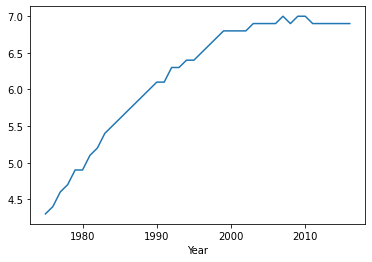

In [493]:
(df_brazil[df_brazil['Sex'] == 'Female']['Obesity'] - df_brazil[df_brazil['Sex'] == 'Male']['Obesity']).plot()

In [307]:
female_obesity_years = df_obesity[(df_obesity['Sex'] == 'Female') & (df_obesity['Country'] == 'Brazil')][['Obesity', 'Year']].set_index('Year')

In [315]:
male_obesity_years = df_obesity[(df_obesity['Sex'] == 'Male') & (df_obesity['Country'] == 'Brazil')][['Obesity', 'Year']].set_index('Year')

In [321]:
female_obesity_years.mean()

Obesity    15.85
dtype: float64

In [322]:
male_obesity_years.mean()

Obesity    9.671429
dtype: float64

In [320]:
(female_obesity_years - male_obesity_years).mean()

Obesity    6.178571
dtype: float64

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

<AxesSubplot:xlabel='Year'>

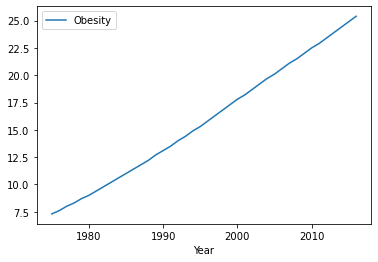

In [333]:
df_obesity[(df_obesity['Sex'] == 'Female') & (df_obesity['Country'] == 'Brazil')][['Obesity', 'Year']].set_index('Year').plot()

<AxesSubplot:xlabel='Year'>

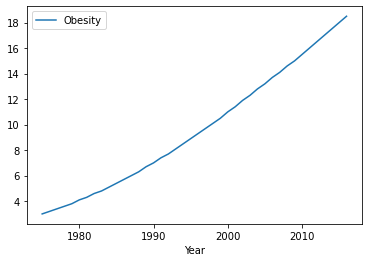

In [494]:
df_obesity[(df_obesity['Sex'] == 'Male') & (df_obesity['Country'] == 'Brazil')][['Obesity','Year']].set_index('Year').plot()

In [497]:
df_ambos_sexos = df_obesity[df_obesity['Sex'] == 'Both sexes']

<AxesSubplot:xlabel='Year'>

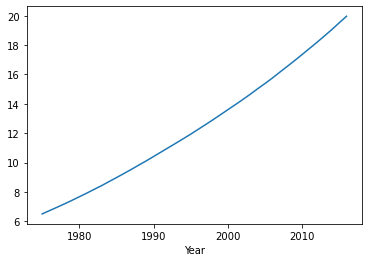

In [500]:
df_ambos_sexos.groupby('Year')['Obesity'].mean().plot()

## Perguntas - GDP Per Person (1901-2011)

In [919]:
df_gdp = pd.read_csv("Datasets/GDP.csv", decimal=".")

In [920]:
df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [921]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   4419 non-null   object
 1   Region    4419 non-null   object
 2   Year      4419 non-null   object
 3    GDP_pp   4419 non-null   object
dtypes: object(4)
memory usage: 138.2+ KB


In [922]:
#Correção do Professor
# df_gdp['Year'] = df_gdp['Year'].apply(lambda x : int(x.split('/')[-1]))

In [923]:
df_gdp['Year'] = df_gdp['Year'].apply(lambda x : pd.to_datetime(x).year)

In [924]:
#Correção do Professor
# df_gdp['gdp'] = df_gdp[' GDP_pp '].apply(lambda x : float(x.strip().replace(',', '')))

In [925]:
df_gdp['gdp'] = df_gdp[' GDP_pp '].str.strip().str.replace(',', '').astype(float)

In [926]:
del df_gdp[' GDP_pp ']

- Você conseguiria informar o primeiro valor registrado de cada país?

In [927]:
df_gdp.groupby('Country')['Year'].min()[df_gdp.groupby('Country')['Year'].min() == 1991]

Country
Kosovo    1991
Name: Year, dtype: int64

- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [928]:
#Tinha entendido que era cresicmento médio no seculo passado por região
#df_gdp[(df_gdp['Year']  >= 1901) & (df_gdp['Year'] < 2000)][['Region','gdp']].groupby('Region').mean().sort_values('gdp', ascending=False)

df_gdp_inicio = df_gdp[df_gdp['Year'] == 1901]
df_gdp_fim = df_gdp[df_gdp['Year'] == 1996]

(((df_gdp_fim.groupby('Region')['gdp'].mean() / df_gdp_inicio.groupby('Region')['gdp'].mean()) -1) *100).sort_values(ascending=False)

Region
Middle East, North Africa, and Greater Arabia    857.215950
Asia                                             711.761516
Europe                                           594.046167
North America                                    589.760175
Central America and the Caribbean                406.426789
Australia and Oceania                            396.075383
South America                                    312.123735
Sub-Saharan Africa                               248.633780
Name: gdp, dtype: float64

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [929]:
#import time
#t1 = time.time()

lista = []
for j in range(len(df_gdp.index) - 1):
    #print((df_gdp.iloc[j + 1]['Year'] - df_gdp.iloc[j]['Year']))
    if (df_gdp.iloc[j + 1]['Year'] - df_gdp.iloc[j]['Year'])== 5:
        for i in range(4):
            registro = {}
            registro['Country'] = df_gdp.iloc[j]['Country']
            registro['Region'] = df_gdp.iloc[j]['Region']
            registro['Year'] = df_gdp.iloc[j]['Year'] + (i  + 1)
            registro['gdp'] = df_gdp.iloc[j]['gdp'] + (((df_gdp.iloc[j + 1]['gdp'] - df_gdp.iloc[j]['gdp']) / 5)* (i + 1))
            
            #Demora 5x mais o tempo de execução
            #df_gdp = df_gdp.append(registro, ignore_index=True)
            
            lista.append(registro)
            
df_gdp = df_gdp.append(lista)

#tempoExec = time.time() - t1
#print("Tempo de execução: {} segundos".format(tempoExec))

Tempo de execução: 18.68323826789856 segundos


In [930]:
df_gdp.sort_values(['Country','Year'])

,Country,Region,Year,gdp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.990
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.000
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.010
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.020
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.030
...,...,...,...,...
16900,Zimbabwe,Sub-Saharan Africa,2007,521.402
16901,Zimbabwe,Sub-Saharan Africa,2008,522.634
16902,Zimbabwe,Sub-Saharan Africa,2009,523.866
16903,Zimbabwe,Sub-Saharan Africa,2010,525.098


In [836]:
df_aux = pd.DataFrame(columns= df_gdp.columns)

In [841]:
i = 0
j = 0

registro = {}
registro['Country'] = df_gdp.iloc[j]['Country']
registro['Regison'] = df_gdp.iloc[j]['Region']
registro['Year'] = df_gdp.iloc[j]['Year'] + (i  + 1)
registro['gdp'] = df_gdp.iloc[j]['gdp'] + (((df_gdp.iloc[j]['gdp'] - df_gdp.iloc[j + 1]['gdp']) / 5)* (i + 1))
            

In [843]:
lista = []
lista.append(registro)

In [844]:
lista

[{'Country': 'Afghanistan',
  'Regison': 'Middle East, North Africa, and Greater Arabia',
  'Year': 1902,
  'gdp': 611.98}]

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

- Há uma relação entre níveis de obesidade e gdp per capita?